## Dataset

Dicionário de dados:

    
asin: A unique alphanumeric identifier assigned by Amazon to each product.

title: The name or title of the product as displayed on Amazon.

price:The current selling price of the product (in USD).

list_price: The original price of the product before any discounts are applied (in USD).

rating: The average customer rating for the product, typically on a scale of 1 to 5 stars.

reviews: The total number of customer reviews the product has received.

sold_past_month: The estimated number of units sold in the last 30 days.

is_bestseller: Indicates whether the product is a bestseller in its category.

is_prime: Indicates whether the product is eligible for Amazon Prime benefits.

is_amazon_choice: Indicates whether the product is amazon choice.

has_sustainability_features: Indicates whether the product has sustainability certifications or features.

available_offers: The number of different sellers or offers available for the product.

amazon_choice_type: The search term or category for which the product is designated as (Overall Pick, New Arrival Pick).

brand: The name of the brand or manufacturer of the product.

free_delivery_date: The estimated date the product will be delivered with free shipping.

fastest_delivery_date; he earliest possible delivery date, usually with expedited shipping options.




In [6]:
import pandas as pd

file_path = '/content/drive/MyDrive/domentos faculdade/probalidade_estatistica/Amazon_products.pkl'

# Carregando o DataFrame
amazon_data = pd.read_pickle(file_path)
amazon_data.head()
 # Exibe as primeiras linhas


,asin,title,price,list_price,rating,reviews,sold_past_month,is_bestseller,is_prime,is_amazon_choice,has_sustainability_features,available_offers,amazon_choice_type,brand,free_delivery_date,fastest_delivery_date
0,B0DJK7NW1J,"15.6 Inch Laptops, Windows 11 Laptop Computers...",199.98,679.99,4.4 out of 5 stars,48,100+,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,B0BS4BP8FB,Acer Aspire 3 A315-24P-R7VH Slim Laptop | 15.6...,279.99,321.99,4.4 out of 5 stars,"39,243",8K+,False,False,True,False,6,Overall Pick,NaN,NaN,NaN
2,B0DKDY78K3,"Newest Gaming Laptop, Laptop with AMD Ryzen 7 ...",649.99,"1,699.99",4.8 out of 5 stars,18,100+,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,B0CPL25J3W,"HP Portable Laptop, Student and Business, 14"" ...",197.35,269.00,4.1 out of 5 stars,"1,678",1K+,False,False,False,False,25,NaN,NaN,NaN,NaN
4,B0947BJ67M,"HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...",176.00,209.99,4.0 out of 5 stars,"1,861",4K+,False,False,False,False,50,NaN,NaN,NaN,NaN


## Análise Exploratória de Dados (EDA)

In [9]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configurar o estilo dos gráficos
sns.set_style("whitegrid")

amazon_data.info()

amazon_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   asin                         1242 non-null   object
 1   title                        1242 non-null   object
 2   price                        1172 non-null   object
 3   list_price                   657 non-null    object
 4   rating                       1224 non-null   object
 5   reviews                      1224 non-null   object
 6   sold_past_month              1134 non-null   object
 7   is_bestseller                1242 non-null   bool  
 8   is_prime                     1242 non-null   bool  
 9   is_amazon_choice             1242 non-null   bool  
 10  has_sustainability_features  1242 non-null   bool  
 11  available_offers             775 non-null    object
 12  amazon_choice_type           69 non-null     object
 13  brand                        339 

,asin,title,price,list_price,rating,reviews,sold_past_month,is_bestseller,is_prime,is_amazon_choice,has_sustainability_features,available_offers,amazon_choice_type,brand,free_delivery_date,fastest_delivery_date
count,1242,1242,1172,657,1224,1224,1134,1242,1242,1242,1242,775,69,339,588,322
unique,937,1027,471,205,19,741,19,2,2,2,2,52,2,21,17,7
top,B0BKW3LB2B,"TECKNET Wireless Mouse, 2.4G Ergonomic Optical...",99.99,19.99,4.6 out of 5 stars,"6,698",1K+,False,False,False,False,2,Overall Pick,acer,"Tue, Nov 19","Tomorrow, Nov 15"
freq,6,6,35,22,258,8,215,1207,695,1173,987,216,65,38,502,173


### Limpeza e Tratamento de Dados

Convertendo as colunas numéricas para o tipo float

In [19]:
amazon_data['price'] = pd.to_numeric(amazon_data['price'], errors='coerce')

In [21]:
amazon_data['list_price'] = pd.to_numeric(amazon_data['list_price'], errors='coerce')

In [22]:
amazon_data['rating'] = amazon_data['rating'].str.extract(r'(\d+\.\d+)').astype(float)

In [24]:
amazon_data['reviews'] = amazon_data['reviews'].replace({',': ''}, regex=True).astype(float)

In [26]:
amazon_data['sold_past_month'] = amazon_data['sold_past_month'].replace({'K': '000', '\+': ''}, regex=True).astype(float)

In [29]:
amazon_data['available_offers'] = pd.to_numeric(amazon_data['available_offers'], errors='coerce')

In [30]:
amazon_data.describe()

,price,list_price,rating,reviews,sold_past_month,available_offers
count,1161.000000,629.000000,1224.000000,1224.000000,1134.000000,775.000000
mean,133.625039,154.525103,4.447631,7171.098039,1939.065256,9.065806
std,176.069267,183.792605,0.245837,13880.088588,2680.645449,11.330121
min,2.490000,3.990000,2.700000,1.000000,50.000000,1.000000
25%,19.990000,27.990000,4.300000,347.000000,300.000000,2.000000
50%,68.470000,95.000000,4.500000,1668.000000,1000.000000,5.000000
75%,169.890000,199.970000,4.600000,7306.750000,2000.000000,11.000000
max,999.990000,999.990000,5.000000,101109.000000,10000.000000,106.000000


In [31]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         1242 non-null   object 
 1   title                        1242 non-null   object 
 2   price                        1161 non-null   float64
 3   list_price                   629 non-null    float64
 4   rating                       1224 non-null   float64
 5   reviews                      1224 non-null   float64
 6   sold_past_month              1134 non-null   float64
 7   is_bestseller                1242 non-null   bool   
 8   is_prime                     1242 non-null   bool   
 9   is_amazon_choice             1242 non-null   bool   
 10  has_sustainability_features  1242 non-null   bool   
 11  available_offers             775 non-null    float64
 12  amazon_choice_type           69 non-null     object 
 13  brand             

### Visualização dos Dados

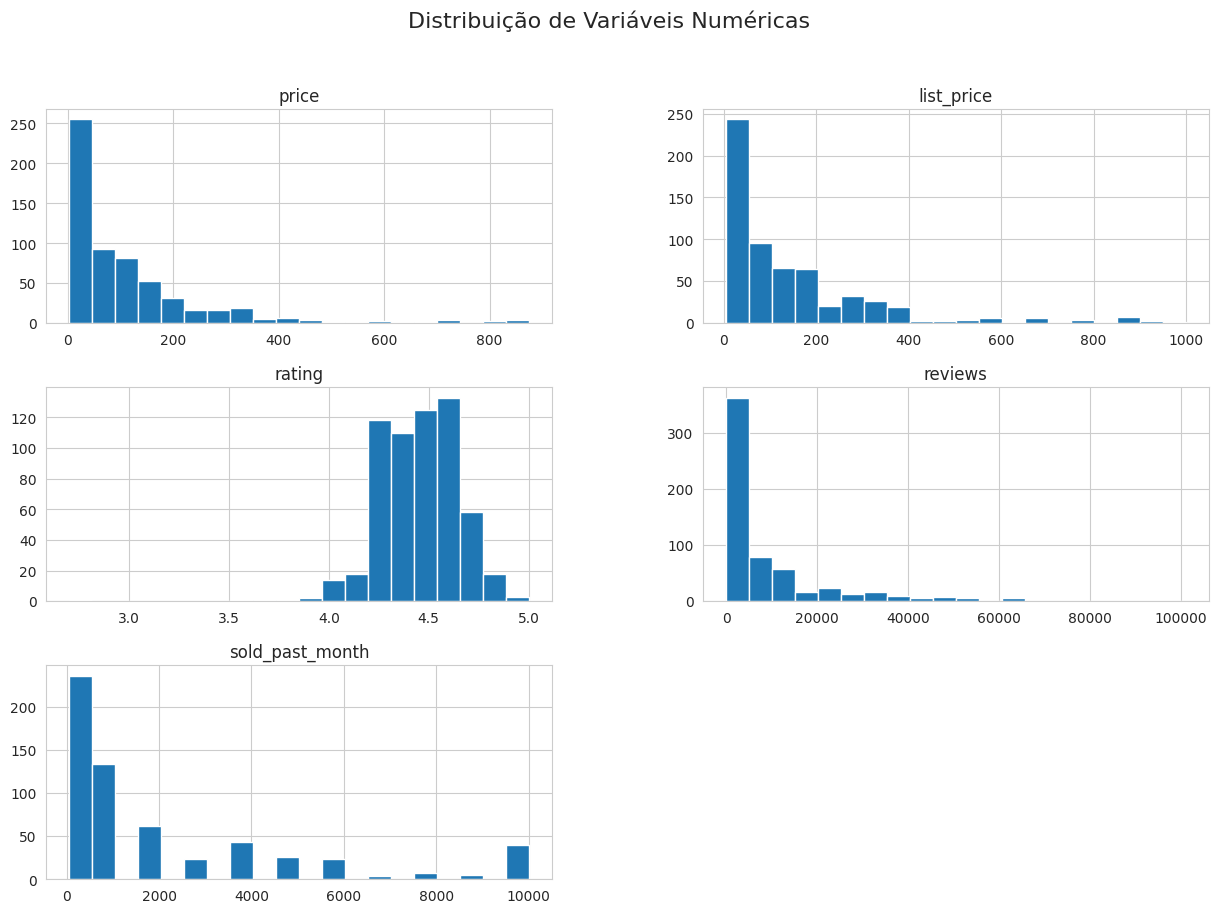

In [33]:
# Ignorar valores nulos ao criar os gráficos

# Lista de colunas numéricas para o histograma
num_cols = ['price', 'list_price', 'rating', 'reviews', 'sold_past_month']

# Criar histogramas para variáveis numéricas, ignorando valores nulos
amazon_data[num_cols].dropna().hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição de Variáveis Numéricas', fontsize=16)
plt.show()


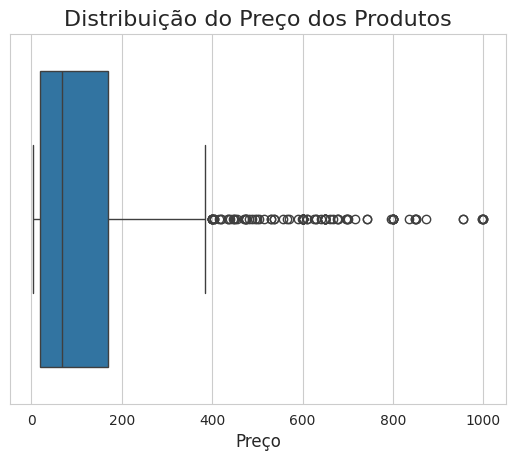

In [34]:
# Criar boxplot para a coluna 'price', ignorando valores nulos
sns.boxplot(x=amazon_data['price'].dropna())
plt.title('Distribuição do Preço dos Produtos', fontsize=16)
plt.xlabel('Preço', fontsize=12)
plt.show()


## Questões para orientar a análise

### 1-Quais variáveis influenciam o preço final de um produto?


*   Aqui será utilizada regressão linear múltipla.
*   Avaliar se a avaliação média (rating), o status de Amazon Choice e Best Seller influenciam o preço.



In [44]:
# Selecionar variáveis de interesse
amazon_data_subset = amazon_data[['price', 'rating', 'reviews', 'is_bestseller', 'is_amazon_choice']].dropna()

X = amazon_data_subset[['rating', 'reviews', 'is_bestseller', 'is_amazon_choice']]
y = amazon_data_subset['price']

# Remover valores nulos
X = X.dropna()
y = y.loc[X.index]

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² do modelo: {r2}')

R² do modelo: 0.07357719765466242


### 2-Quais produtos têm o maior desconto?



*  Comparar o preço original (list_price) com o preço final (price) e calcular o percentual de desconto.

*   Identificar marcas que mais aplicam descontos.



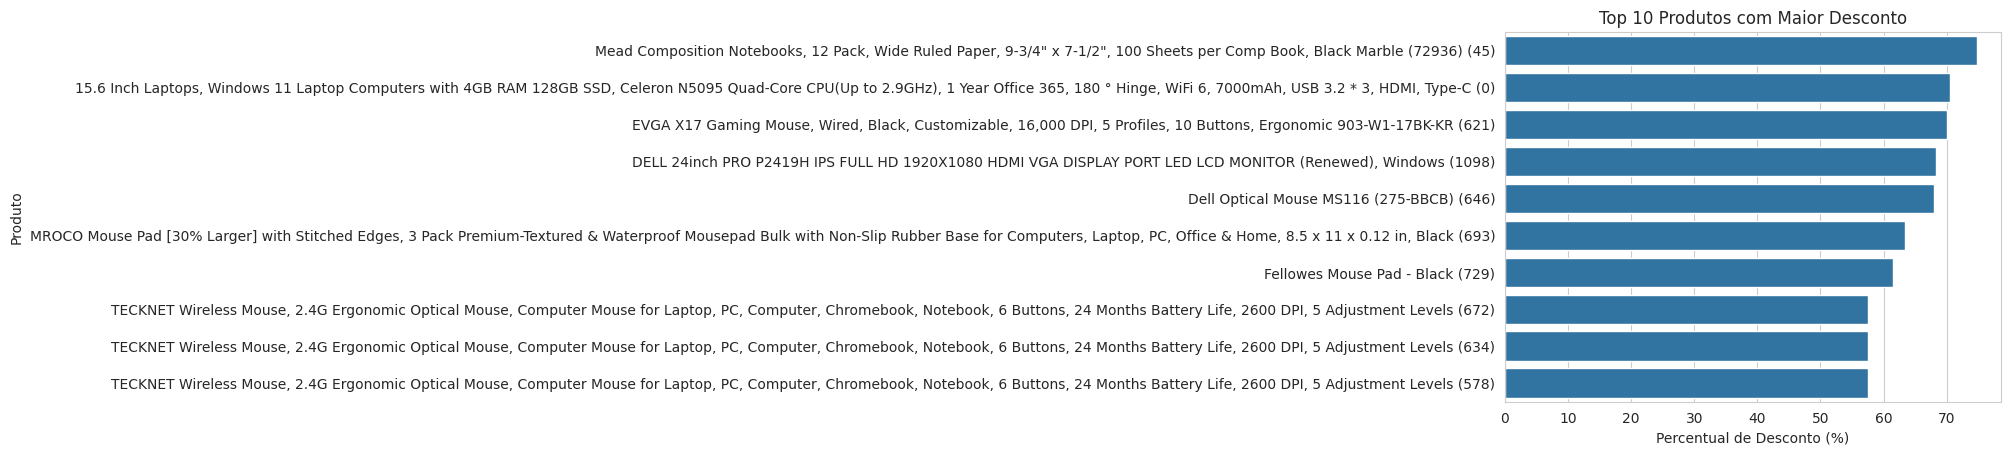

In [46]:
# Calcular o percentual de desconto
amazon_data['discount_percent'] = ((amazon_data['list_price'] - amazon_data['price']) / amazon_data['list_price']) * 100

# Adicionar uma coluna de rótulo único com o título + índice para evitar duplicatas
amazon_data['unique_label'] = amazon_data['title'] + " (" + amazon_data.index.astype(str) + ")"

# Selecionar os 10 produtos com maior desconto
top_discounts = amazon_data.sort_values(by='discount_percent', ascending=False).head(10)

# Plotar o gráfico com os rótulos únicos
sns.barplot(x='discount_percent', y='unique_label', data=top_discounts)
plt.title('Top 10 Produtos com Maior Desconto')
plt.xlabel('Percentual de Desconto (%)')
plt.ylabel('Produto')
plt.show()



### 3-Como as avaliações dos usuários (rating) variam por marca?



*   Calcular a média de rating por marca.

*   Verificar se algumas marcas possuem consistentemente avaliações melhores.



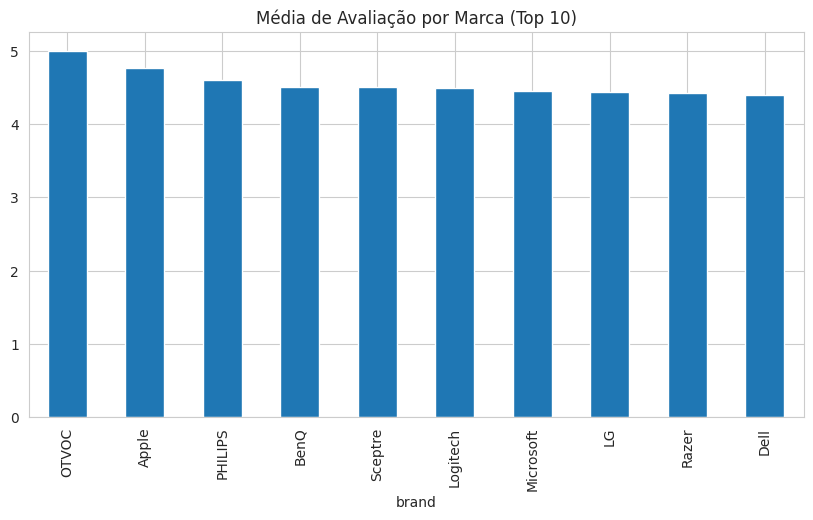

In [47]:
# Agrupar por marca e calcular média de rating
brand_ratings = amazon_data.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10)
brand_ratings.plot(kind='bar', figsize=(10, 5))
plt.title('Média de Avaliação por Marca (Top 10)')
plt.show()


### 4- Quais fatores influenciam o volume de vendas no último mês?

Usar regressão linear múltipla para prever as vendas de produtos (sold_past_month) com base no preço, número de avaliações, se o produto é Amazon Choice ou Best Seller.

In [50]:
# Selecionar variáveis de interesse
amazon_data_subset = amazon_data[['price', 'reviews', 'is_bestseller', 'is_amazon_choice', 'sold_past_month']].dropna()
# Regressão para prever sold_past_month
X = amazon_data_subset[['price', 'reviews', 'is_bestseller', 'is_amazon_choice']]
y = amazon_data_subset['sold_past_month']

# Treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² do modelo para previsão de vendas: {r2}')

R² do modelo para previsão de vendas: 0.4963410945311918


### 5- Verificar se os produtos "Amazon Choice" são mais caros

calcular e comparar os preços médios dos produtos que possuem o selo Amazon Choice com aqueles que não possuem

Preços médios dos produtos:
is_amazon_choice
False    134.876515
True     112.523231
Name: price, dtype: float64


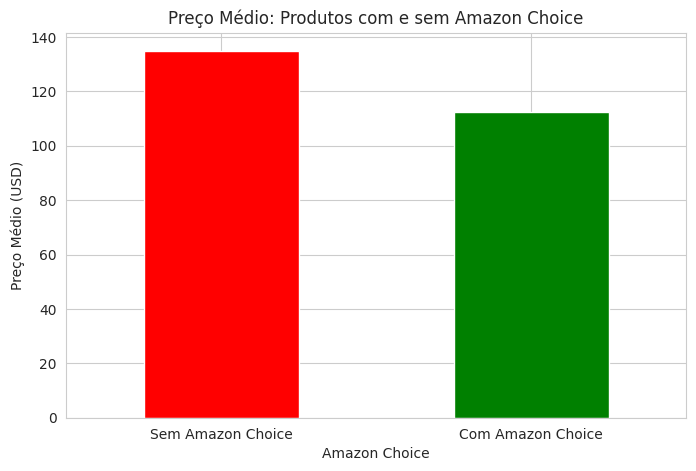

In [54]:
# Calcular o preço médio dos produtos com e sem o selo Amazon Choice
amazon_choice_prices = amazon_data.groupby('is_amazon_choice')['price'].mean()

# Exibir os resultados
print("Preços médios dos produtos:")
print(amazon_choice_prices)

# Plotar um gráfico de barras comparando os preços médios
amazon_choice_prices.plot(kind='bar', color=['red', 'green'], figsize=(8, 5))
plt.title('Preço Médio: Produtos com e sem Amazon Choice')
plt.xlabel('Amazon Choice')
plt.ylabel('Preço Médio (USD)')
plt.xticks(ticks=[0, 1], labels=['Sem Amazon Choice', 'Com Amazon Choice'], rotation=0)
plt.show()


### 6-Dividir os preços em faixas de valores e calcular a avaliação média

<ipython-input-56-f41a85d2c83c>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating_summary = amazon_data.groupby('price_range').agg(


Tabela de Frequência de Faixas de Preço:
  price_range  avg_rating  frequency
0        0-50    4.495385        523
1      50-100    4.467822        202
2     100-200    4.417085        203
3     200-500    4.356627        167
4    500-1000    4.352308         66
5       1000+         NaN          0


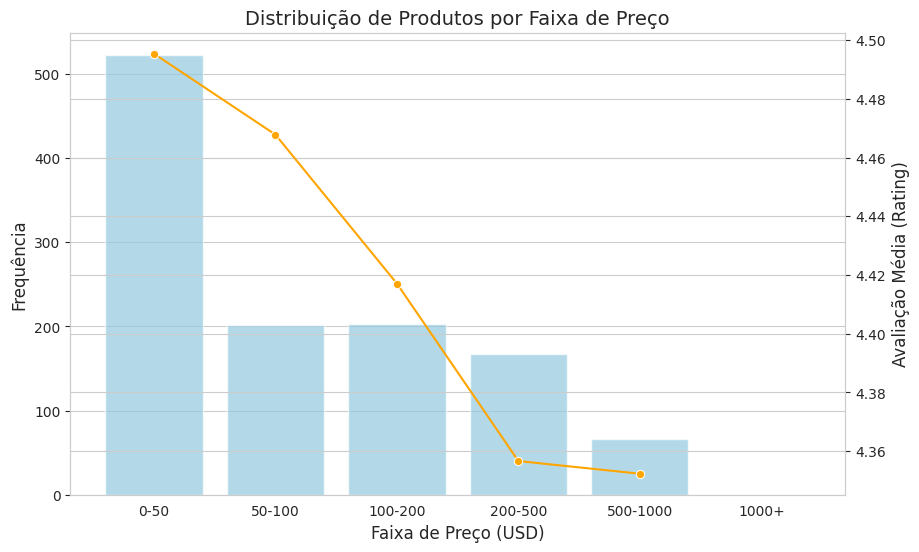

In [56]:
# Definir as faixas de preços, ensuring they are monotonically increasing
bins = [0, 50, 100, 200, 500, 1000, float('inf')]  # Use float('inf') to represent infinity and ensure the last bin encompasses all values above 1000
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+']

# Criar a coluna de faixas de preços
amazon_data['price_range'] = pd.cut(amazon_data['price'], bins=bins, labels=labels, include_lowest=True)

# Calcular a avaliação média e frequência para cada faixa de preço
price_rating_summary = amazon_data.groupby('price_range').agg(
    avg_rating=('rating', 'mean'),
    frequency=('price', 'count')
).reset_index()

# Exibir a tabela de frequência
print("Tabela de Frequência de Faixas de Preço:")
print(price_rating_summary)

# Plotar os resultados
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a frequência
sns.barplot(x='price_range', y='frequency', data=price_rating_summary, ax=ax1, color='skyblue', alpha=0.7)
ax1.set_title('Distribuição de Produtos por Faixa de Preço', fontsize=14)
ax1.set_ylabel('Frequência', fontsize=12)
ax1.set_xlabel('Faixa de Preço (USD)', fontsize=12)

# Gráfico de linha para a avaliação média
ax2 = ax1.twinx()
sns.lineplot(x='price_range', y='avg_rating', data=price_rating_summary, ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Avaliação Média (Rating)', fontsize=12)

plt.show()


## Dados quantitativos discretos

### Análise de reviews (Número de Avaliações)

In [66]:
# 1. Tabela de Frequências
reviews_freq = amazon_data['reviews'].value_counts().reset_index()
reviews_freq.columns = ['Número de Avaliações', 'Frequência']
reviews_freq = reviews_freq.sort_values(by='Número de Avaliações')
print("Tabela de Frequências - Número de Avaliações:")
reviews_freq

Tabela de Frequências - Número de Avaliações:


,Número de Avaliações,Frequência
174,1.0,2
8,2.0,6
1,3.0,8
2,4.0,7
34,5.0,4
...,...,...
112,84472.0,3
43,90878.0,4
312,96830.0,1
188,97246.0,2


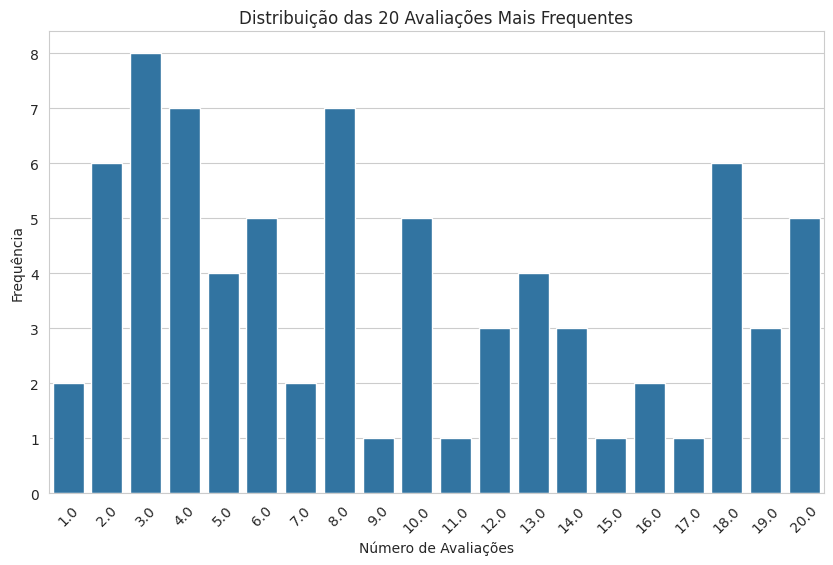


Medidas Descritivas - Número de Avaliações:
count      1224.000000
mean       7171.098039
std       13880.088588
min           1.000000
25%         347.000000
50%        1668.000000
75%        7306.750000
max      101109.000000
Name: reviews, dtype: float64


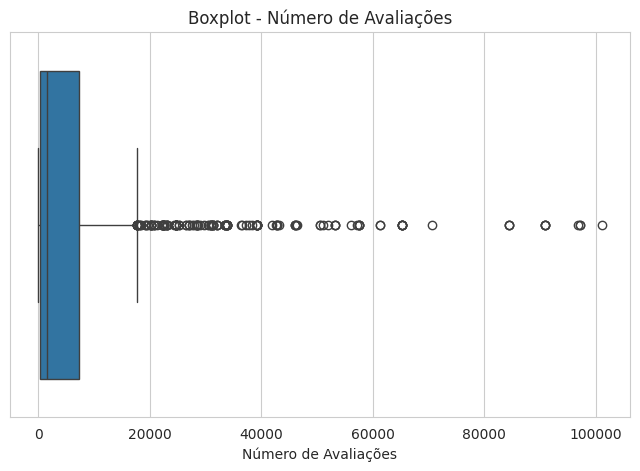

In [67]:
# 2. Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Número de Avaliações', y='Frequência', data=reviews_freq.head(20))
plt.title('Distribuição das 20 Avaliações Mais Frequentes')
plt.xlabel('Número de Avaliações')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# 3. Medidas Descritivas
reviews_stats = amazon_data['reviews'].describe()
print("\nMedidas Descritivas - Número de Avaliações:")
print(reviews_stats)

# 4. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=amazon_data['reviews'].dropna())
plt.title('Boxplot - Número de Avaliações')
plt.xlabel('Número de Avaliações')
plt.show()


### Análise de sold_past_month (Produtos Vendidos no Último Mês)

In [64]:
# 1. Tabela de Frequências
sold_freq = amazon_data['sold_past_month'].value_counts().reset_index()
sold_freq.columns = ['Unidades Vendidas', 'Frequência']
sold_freq = sold_freq.sort_values(by='Unidades Vendidas')
print("Tabela de Frequências - Unidades Vendidas:")
sold_freq

Tabela de Frequências - Unidades Vendidas:


,Unidades Vendidas,Frequência
5,50.0,80
2,100.0,116
4,200.0,84
9,300.0,51
8,400.0,54
1,500.0,160
15,600.0,6
17,700.0,3
18,900.0,1
0,1000.0,215


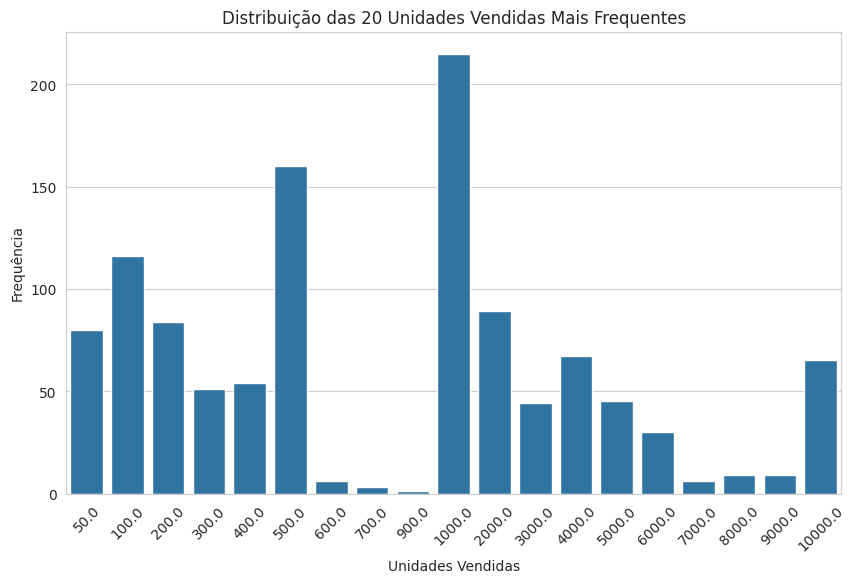


Medidas Descritivas - Unidades Vendidas:
count     1134.000000
mean      1939.065256
std       2680.645449
min         50.000000
25%        300.000000
50%       1000.000000
75%       2000.000000
max      10000.000000
Name: sold_past_month, dtype: float64


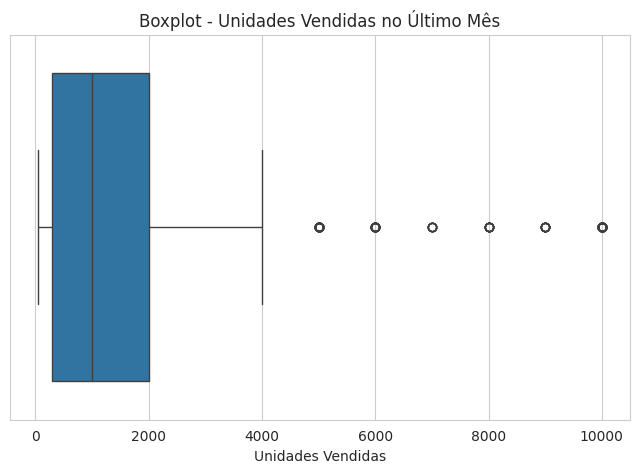

In [65]:
# 2. Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Unidades Vendidas', y='Frequência', data=sold_freq.head(20))
plt.title('Distribuição das 20 Unidades Vendidas Mais Frequentes')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# 3. Medidas Descritivas
sold_stats = amazon_data['sold_past_month'].describe()
print("\nMedidas Descritivas - Unidades Vendidas:")
print(sold_stats)

# 4. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=amazon_data['sold_past_month'].dropna())
plt.title('Boxplot - Unidades Vendidas no Último Mês')
plt.xlabel('Unidades Vendidas')
plt.show()


### Análise de available_offers (Ofertas Disponíveis)

In [61]:
# 1. Tabela de Frequências
offers_freq = amazon_data['available_offers'].value_counts().reset_index()
offers_freq.columns = ['Número de Ofertas', 'Frequência']
offers_freq = offers_freq.sort_values(by='Número de Ofertas')
print("Tabela de Frequências - Número de Ofertas:")
offers_freq

Tabela de Frequências - Número de Ofertas:


,Número de Ofertas,Frequência
11,1.0,17
0,2.0,216
1,3.0,87
3,4.0,56
2,5.0,64
4,6.0,44
5,7.0,31
7,8.0,23
6,9.0,24
10,10.0,18


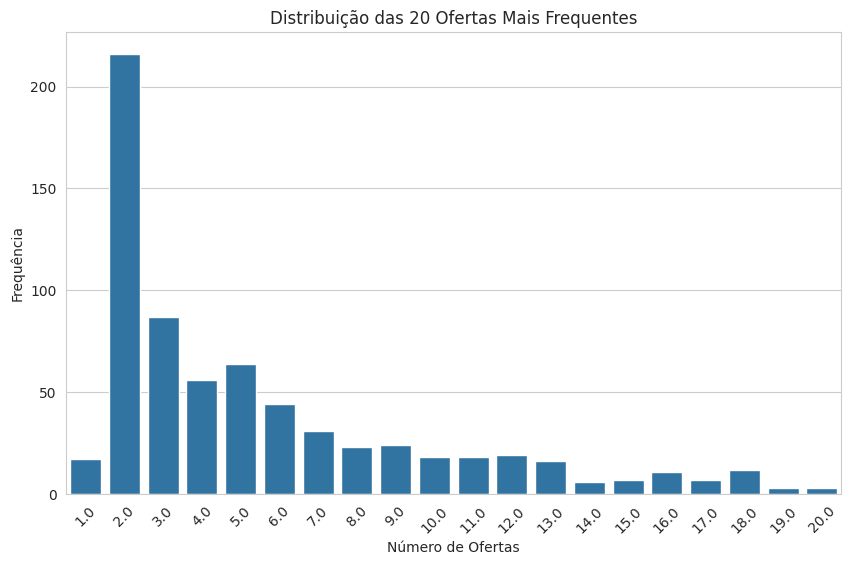


Medidas Descritivas - Número de Ofertas:
count    775.000000
mean       9.065806
std       11.330121
min        1.000000
25%        2.000000
50%        5.000000
75%       11.000000
max      106.000000
Name: available_offers, dtype: float64


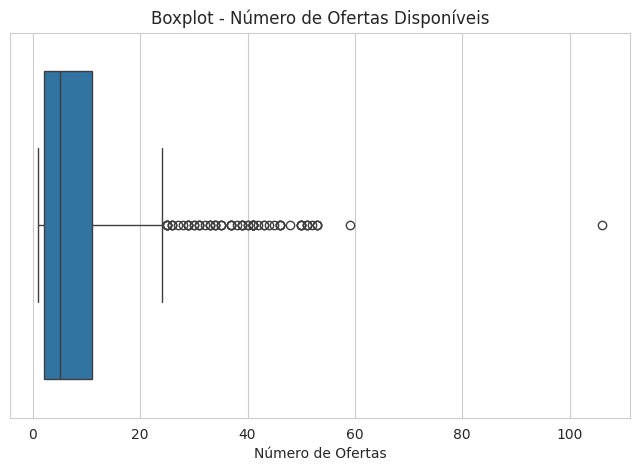

In [62]:
# 2. Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Número de Ofertas', y='Frequência', data=offers_freq.head(20))
plt.title('Distribuição das 20 Ofertas Mais Frequentes')
plt.xlabel('Número de Ofertas')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# 3. Medidas Descritivas
offers_stats = amazon_data['available_offers'].describe()
print("\nMedidas Descritivas - Número de Ofertas:")
print(offers_stats)

# 4. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=amazon_data['available_offers'].dropna())
plt.title('Boxplot - Número de Ofertas Disponíveis')
plt.xlabel('Número de Ofertas')
plt.show()


## Dados quantitativos continuos

### Análise de price (Preço Final do Produto)

In [69]:
# 1. Criar classes e construir tabela de frequências
price_bins = pd.cut(amazon_data['price'].dropna(), bins=10)
price_freq = price_bins.value_counts().reset_index()
price_freq.columns = ['Faixa de Preço', 'Frequência']
price_freq = price_freq.sort_values(by='Faixa de Preço')
print("Tabela de Frequências - Faixas de Preço:")
price_freq

Tabela de Frequências - Faixas de Preço:


,Faixa de Preço,Frequência
0,"(1.493, 102.24]",725
1,"(102.24, 201.99]",203
2,"(201.99, 301.74]",91
3,"(301.74, 401.49]",54
4,"(401.49, 501.24]",22
6,"(501.24, 600.99]",21
5,"(600.99, 700.74]",22
7,"(700.74, 800.49]",10
9,"(800.49, 900.24]",6
8,"(900.24, 999.99]",7


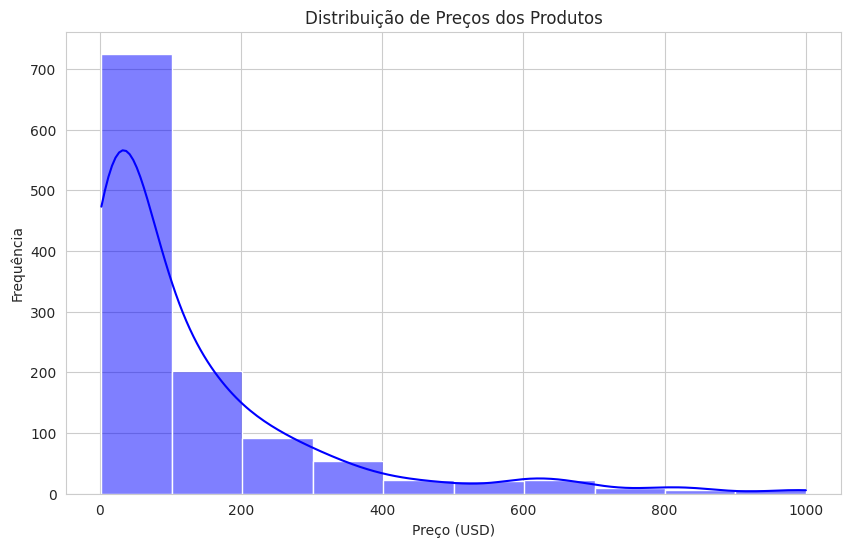


Medidas Descritivas - Preço Final:
count    1161.000000
mean      133.625039
std       176.069267
min         2.490000
25%        19.990000
50%        68.470000
75%       169.890000
max       999.990000
Name: price, dtype: float64


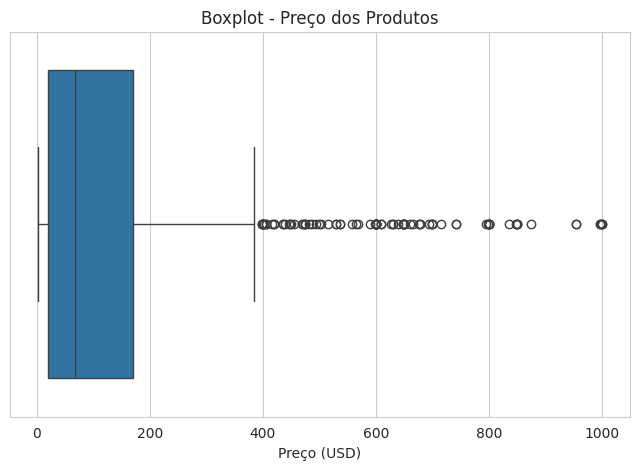

In [70]:
# 2. Gráfico da distribuição dos preços (histograma)
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['price'], bins=10, kde=True, color='blue')
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.show()

# 3. Medidas Descritivas
price_stats = amazon_data['price'].describe()
print("\nMedidas Descritivas - Preço Final:")
print(price_stats)

# 4. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=amazon_data['price'].dropna())
plt.title('Boxplot - Preço dos Produtos')
plt.xlabel('Preço (USD)')
plt.show()


### Análise de list_price (Preço Original do Produto)

In [75]:
# 1. Criar classes e construir tabela de frequências
list_price_bins = pd.cut(amazon_data['list_price'].dropna(), bins=10)
list_price_freq = list_price_bins.value_counts().reset_index()
list_price_freq.columns = ['Faixa de Preço Original', 'Frequência']
list_price_freq = list_price_freq.sort_values(by='Faixa de Preço Original')
print("Tabela de Frequências - Faixas de Preço Original:")
list_price_freq

Tabela de Frequências - Faixas de Preço Original:


,Faixa de Preço Original,Frequência
0,"(2.994, 103.59]",345
1,"(103.59, 203.19]",137
2,"(203.19, 302.79]",56
3,"(302.79, 402.39]",46
7,"(402.39, 501.99]",6
4,"(501.99, 601.59]",13
5,"(601.59, 701.19]",10
8,"(701.19, 800.79]",5
6,"(800.79, 900.39]",9
9,"(900.39, 999.99]",2


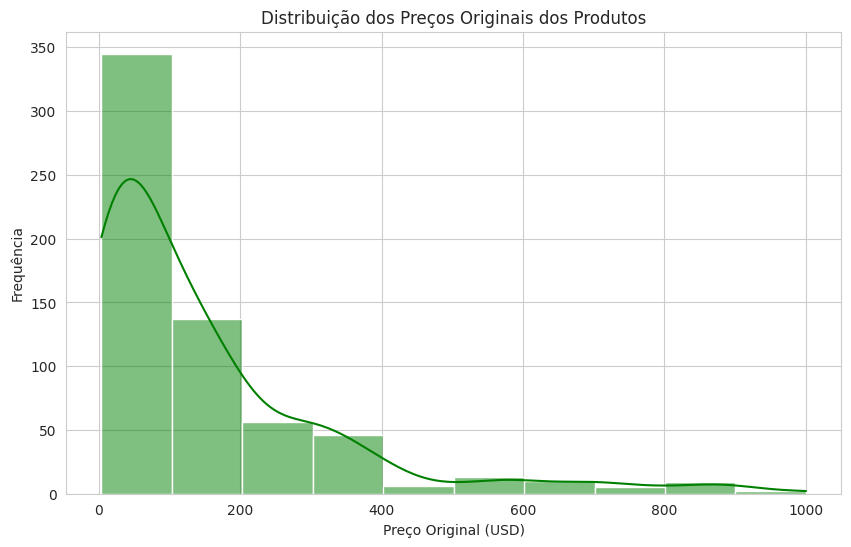


Medidas Descritivas - Preço Original:
count    629.000000
mean     154.525103
std      183.792605
min        3.990000
25%       27.990000
50%       95.000000
75%      199.970000
max      999.990000
Name: list_price, dtype: float64


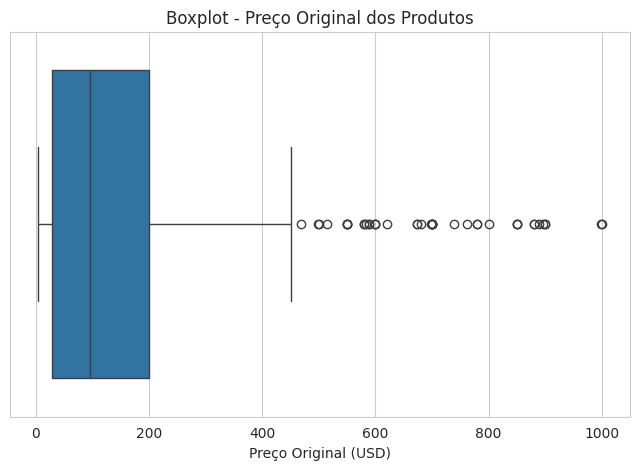

In [72]:
# 2. Gráfico da distribuição dos preços originais (histograma)
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['list_price'], bins=10, kde=True, color='green')
plt.title('Distribuição dos Preços Originais dos Produtos')
plt.xlabel('Preço Original (USD)')
plt.ylabel('Frequência')
plt.show()

# 3. Medidas Descritivas
list_price_stats = amazon_data['list_price'].describe()
print("\nMedidas Descritivas - Preço Original:")
print(list_price_stats)

# 4. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=amazon_data['list_price'].dropna())
plt.title('Boxplot - Preço Original dos Produtos')
plt.xlabel('Preço Original (USD)')
plt.show()


### Análise de rating (Avaliação Média)

In [74]:
# 1. Criar classes e construir tabela de frequências
rating_bins = pd.cut(amazon_data['rating'].dropna(), bins=5)  # 5 classes para avaliação
rating_freq = rating_bins.value_counts().reset_index()
rating_freq.columns = ['Faixa de Avaliação', 'Frequência']
rating_freq = rating_freq.sort_values(by='Faixa de Avaliação')
print("Tabela de Frequências - Faixas de Avaliação:")
rating_freq

Tabela de Frequências - Faixas de Avaliação:


,Faixa de Avaliação,Frequência
4,"(2.698, 3.16]",2
3,"(3.16, 3.62]",8
2,"(3.62, 4.08]",58
0,"(4.08, 4.54]",708
1,"(4.54, 5.0]",448


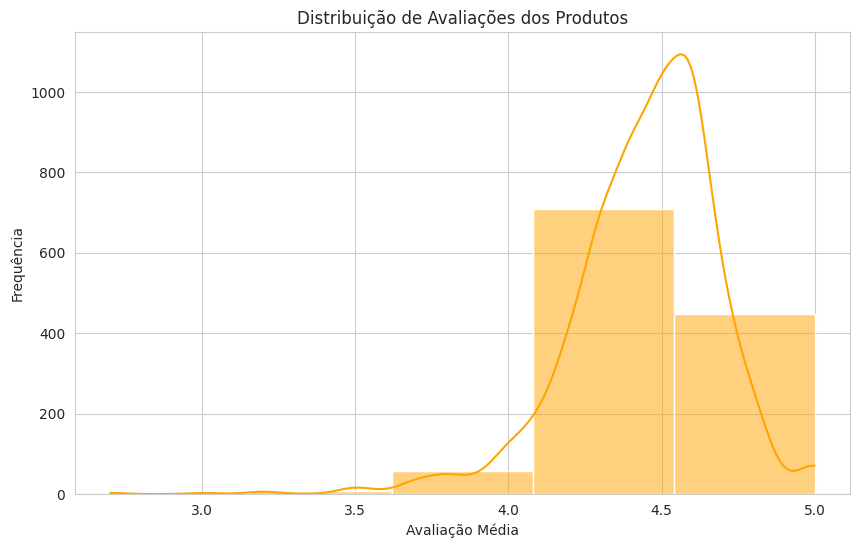


Medidas Descritivas - Avaliação Média:
count    1224.000000
mean        4.447631
std         0.245837
min         2.700000
25%         4.300000
50%         4.500000
75%         4.600000
max         5.000000
Name: rating, dtype: float64


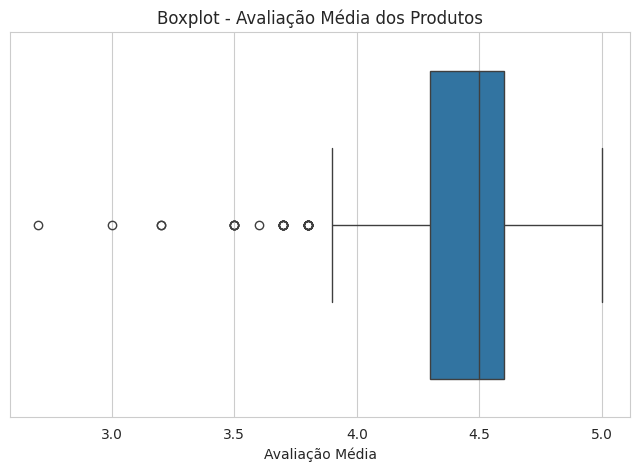

In [76]:
# 2. Gráfico da distribuição das avaliações (histograma)
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['rating'], bins=5, kde=True, color='orange')
plt.title('Distribuição de Avaliações dos Produtos')
plt.xlabel('Avaliação Média')
plt.ylabel('Frequência')
plt.show()

# 3. Medidas Descritivas
rating_stats = amazon_data['rating'].describe()
print("\nMedidas Descritivas - Avaliação Média:")
print(rating_stats)

# 4. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=amazon_data['rating'].dropna())
plt.title('Boxplot - Avaliação Média dos Produtos')
plt.xlabel('Avaliação Média')
plt.show()


## Dados Qualitativos

### Análise de is_bestseller

In [78]:
# 1. Tabela de Frequências
bestseller_freq = amazon_data['is_bestseller'].value_counts()
bestseller_freq_df = bestseller_freq.reset_index()
bestseller_freq_df.columns = ['É Bestseller', 'Frequência']
print("Tabela de Frequências - É Bestseller:")
bestseller_freq_df

Tabela de Frequências - É Bestseller:


,É Bestseller,Frequência
0,False,1207
1,True,35


<ipython-input-79-f1b9d5fd54e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='É Bestseller', y='Frequência', data=bestseller_freq_df, palette="Blues")


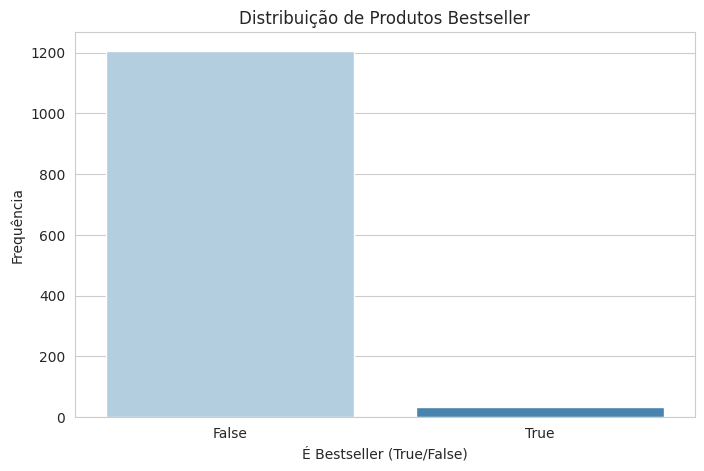

In [79]:
# 2. Gráfico de Barras
plt.figure(figsize=(8, 5))
sns.barplot(x='É Bestseller', y='Frequência', data=bestseller_freq_df, palette="Blues")
plt.title('Distribuição de Produtos Bestseller')
plt.xlabel('É Bestseller (True/False)')
plt.ylabel('Frequência')
plt.show()


### Análise de is_amazon_choice

In [82]:
# 1. Tabela de Frequências
amazon_choice_freq = amazon_data['is_amazon_choice'].value_counts()
amazon_choice_freq_df = amazon_choice_freq.reset_index()
amazon_choice_freq_df.columns = ['É Amazon Choice', 'Frequência']
print("Tabela de Frequências - É Amazon Choice:")
amazon_choice_freq_df

Tabela de Frequências - É Amazon Choice:


,É Amazon Choice,Frequência
0,False,1173
1,True,69


<ipython-input-81-c27ec51a4366>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='É Amazon Choice', y='Frequência', data=amazon_choice_freq_df, palette="Greens")


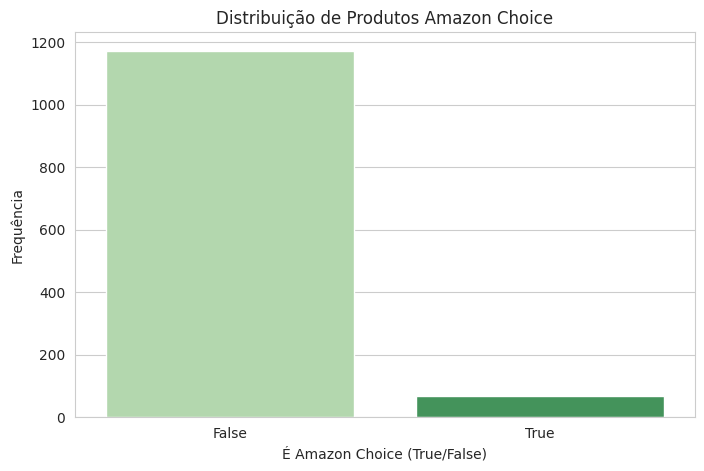

In [81]:
# 2. Gráfico de Barras
plt.figure(figsize=(8, 5))
sns.barplot(x='É Amazon Choice', y='Frequência', data=amazon_choice_freq_df, palette="Greens")
plt.title('Distribuição de Produtos Amazon Choice')
plt.xlabel('É Amazon Choice (True/False)')
plt.ylabel('Frequência')
plt.show()


### Análise de has_sustainability_features

In [84]:
# 1. Tabela de Frequências
sustainability_freq = amazon_data['has_sustainability_features'].value_counts()
sustainability_freq_df = sustainability_freq.reset_index()
sustainability_freq_df.columns = ['Possui Sustentabilidade', 'Frequência']
print("Tabela de Frequências - Possui Características de Sustentabilidade:")
sustainability_freq_df

Tabela de Frequências - Possui Características de Sustentabilidade:


,Possui Sustentabilidade,Frequência
0,False,987
1,True,255


<ipython-input-85-bec9f74edd33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Possui Sustentabilidade', y='Frequência', data=sustainability_freq_df, palette="Purples")


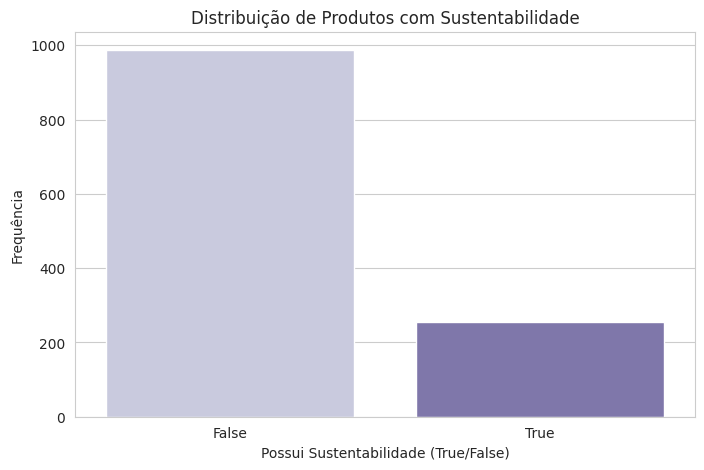

In [85]:
# 2. Gráfico de Barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Possui Sustentabilidade', y='Frequência', data=sustainability_freq_df, palette="Purples")
plt.title('Distribuição de Produtos com Sustentabilidade')
plt.xlabel('Possui Sustentabilidade (True/False)')
plt.ylabel('Frequência')
plt.show()

### Análise de brand

In [87]:
# 1. Tabela de Frequências das 10 Marcas Mais Comuns
brand_freq = amazon_data['brand'].value_counts().head(10)
brand_freq_df = brand_freq.reset_index()
brand_freq_df.columns = ['Marca', 'Frequência']
print("Tabela de Frequências - Top 10 Marcas:")
brand_freq_df

Tabela de Frequências - Top 10 Marcas:


,Marca,Frequência
0,acer,38
1,HP,35
2,ASUS,34
3,Logitech,33
4,Dell,30
5,Razer,28
6,Corsair,27
7,Lenovo,20
8,LG,19
9,SAMSUNG,16


<ipython-input-88-a3082031db93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Marca', data=brand_freq_df, palette="coolwarm")


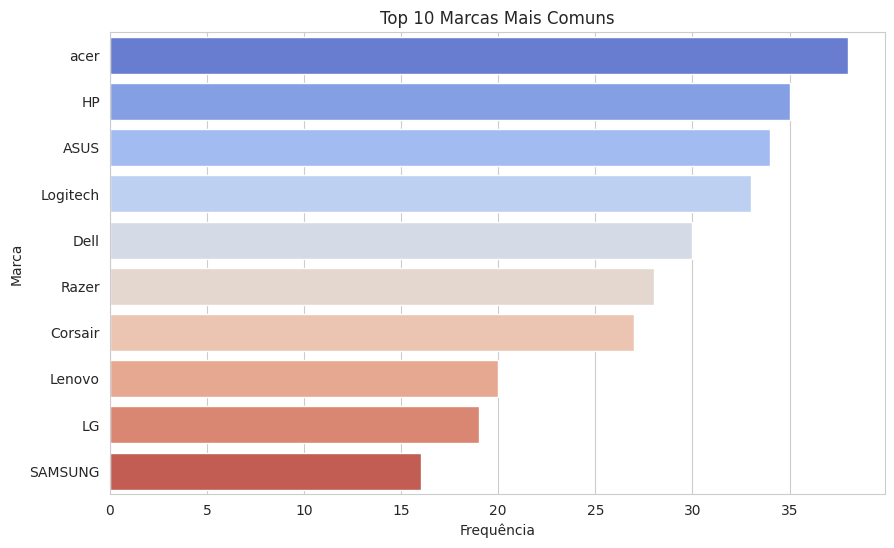

In [88]:
# 2. Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequência', y='Marca', data=brand_freq_df, palette="coolwarm")
plt.title('Top 10 Marcas Mais Comuns')
plt.xlabel('Frequência')
plt.ylabel('Marca')
plt.show()


### Análise de amazon_choice_type

In [89]:
# 1. Tabela de Frequências
amazon_choice_type_freq = amazon_data['amazon_choice_type'].value_counts()
amazon_choice_type_freq_df = amazon_choice_type_freq.reset_index()
amazon_choice_type_freq_df.columns = ['Tipo de Amazon Choice', 'Frequência']
print("Tabela de Frequências - Tipo de Amazon Choice:")
amazon_choice_type_freq_df

Tabela de Frequências - Tipo de Amazon Choice:


,Tipo de Amazon Choice,Frequência
0,Overall Pick,65
1,New Arrival Pick,4


<ipython-input-90-58264959701a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Tipo de Amazon Choice', data=amazon_choice_type_freq_df, palette="Oranges")


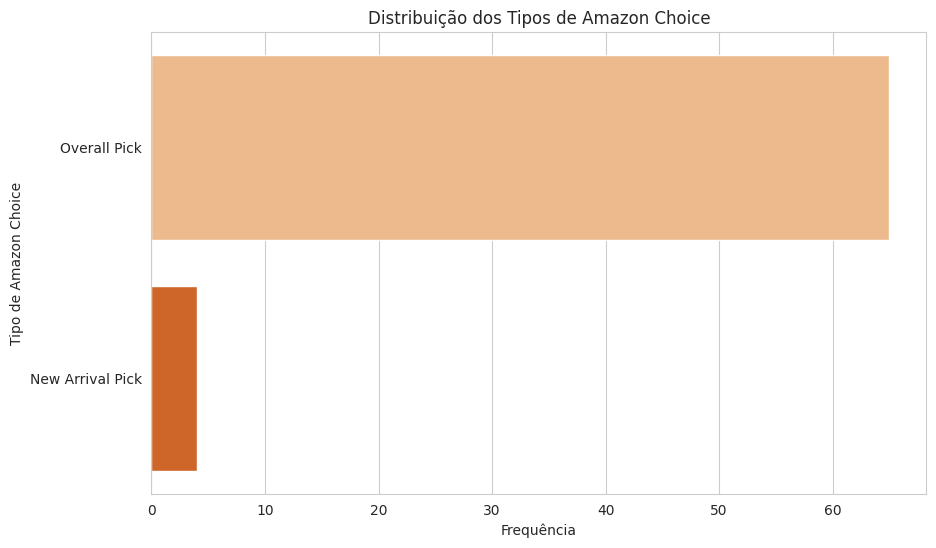

In [90]:
# 2. Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequência', y='Tipo de Amazon Choice', data=amazon_choice_type_freq_df, palette="Oranges")
plt.title('Distribuição dos Tipos de Amazon Choice')
plt.xlabel('Frequência')
plt.ylabel('Tipo de Amazon Choice')
plt.show()
